In [5]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import math
import random
from numpy.random import permutation
df = pd.read_csv("properties_2016.csv")

df_train = pd.read_csv("train_2016_v2.csv")

df_sample = pd.read_csv("sample_submission.csv")
#print df_sample

C:\Users\Aditya\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train['transactiondate'] = pd.to_datetime(df_train['transactiondate'])
check_date= datetime.date(2016,12,1)
#print check_date
#print df
#print df_train.loc[(df_train['transactiondate']>check_date) & (df_train['transactiondate']<=datetime.date(2016,12,30))]
#print df_train['transactiondate']

# Heat Map

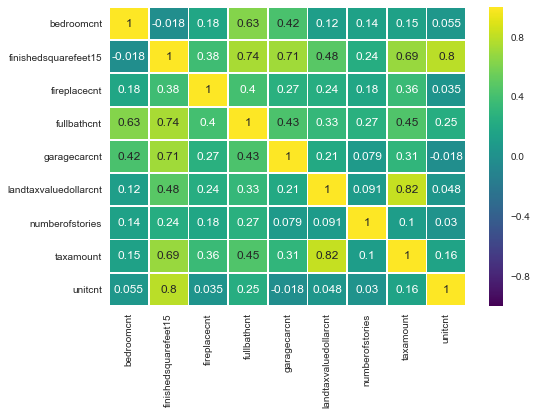

In [20]:


#print df.loc[19,'bathroomcnt']


d = {'bedroomcnt':df['bedroomcnt'],'finishedsquarefeet15':df['finishedsquarefeet15'],'fireplacecnt':df['fireplacecnt'],'garagecarcnt':df['garagecarcnt'],'fullbathcnt':df['fullbathcnt'],'unitcnt':df['unitcnt'],'numberofstories':df['numberofstories'], 'taxamount':df['taxamount'], 'landtaxvaluedollarcnt':df['landtaxvaluedollarcnt']}

data = pd.DataFrame(d)

r = data.corr(method='pearson')
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
#plt.scatter(x=df['bathroomcnt'], y=df['bedroomcnt'])
#plt.plot(x=df['bathroomcnt'], y=df['bedroomcnt'])
plt.show()



In the above heat map, the most positive correlation is between properties 'taxamount' and 'landtaxvaluedollarcnt' which is 0.82.
The most negative correlation is between among two pairs - 'garagecnt' & 'unitcnt' and 'finishedsquarefeet15' & 'bedroomcnt'. BOth have value of -0.018.

# Scatter plot

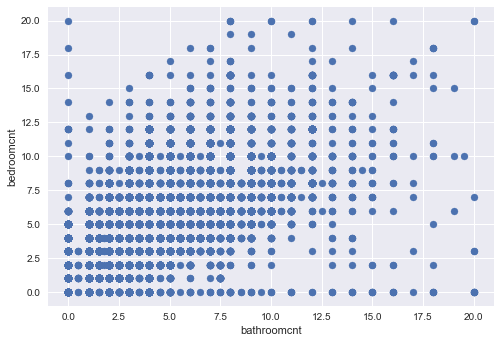

In [17]:


#print df.loc[19,'bathroomcnt']


d = {'bathroomcnt':df['bathroomcnt'],'bedroomcnt':df['bedroomcnt'],'finishedsquarefeet15':df['finishedsquarefeet15'],'fireplacecnt':df['fireplacecnt'],'garagecarcnt':df['garagecarcnt'],'fullbathcnt':df['fullbathcnt'],'unitcnt':df['unitcnt'],'numberofstories':df['numberofstories']}

data = pd.DataFrame(d)

plt.scatter(x=df['bathroomcnt'], y=df['bedroomcnt'])
plt.xlabel('bathroomcnt')
plt.ylabel('bedroomcnt')
#plt.plot(x=df['bathroomcnt'], y=df['bedroomcnt'])
plt.show()

The above scatter plot between bedroomcnt and bathroomcnt describes us the relation between the two properties. We can see that the scatters are more concentrated in bathfroomcnt ranging from (0-10) and bedroomcnt ranging from (0-8). 

# Line Plot

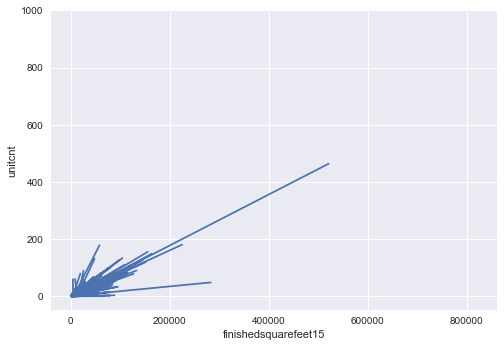

In [18]:


#print df.loc[19,'bathroomcnt']


d = {'bathroomcnt':df['bathroomcnt'],'bedroomcnt':df['bedroomcnt'],'finishedsquarefeet15':df['finishedsquarefeet15'],'fireplacecnt':df['fireplacecnt'],'garagecarcnt':df['garagecarcnt'],'fullbathcnt':df['fullbathcnt'],'unitcnt':df['unitcnt'],'numberofstories':df['numberofstories']}

data = pd.DataFrame(d)

plt.plot(df['finishedsquarefeet15'], df['unitcnt'])
plt.xlabel('finishedsquarefeet15')
plt.ylabel('unitcnt')
#plt.plot(x=df['bathroomcnt'], y=df['bedroomcnt'])
plt.show()

The above line chart between unitcnt and finishedsquarefeet15 describes us the relation between the two properties. We can see that unitcnt increases as finished squarefeet increases.

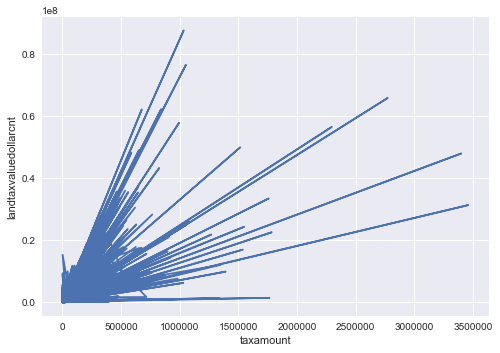

In [4]:
#d = {'bathroomcnt':df['bathroomcnt'],'bedroomcnt':df['bedroomcnt'],'finishedsquarefeet15':df['finishedsquarefeet15'],'fireplacecnt':df['fireplacecnt'],'garagecarcnt':df['garagecarcnt'],'fullbathcnt':df['fullbathcnt'],'unitcnt':df['unitcnt'],'numberofstories':df['numberofstories'],'taxamount':df['taxamount'],'landtaxvaluedollarcnt':df['landtaxvaluedollarcnt']}

plt.plot(df['taxamount'], df['landtaxvaluedollarcnt'])
plt.xlabel('taxamount')
plt.ylabel('landtaxvaluedollarcnt')
#plt.plot(x=df['bathroomcnt'], y=df['bedroomcnt'])
plt.show()

The above line chart between taxamount and landtaxvaluedollarcnt describes us the relation between the two properties. We can see that the two properties are highly correlated.

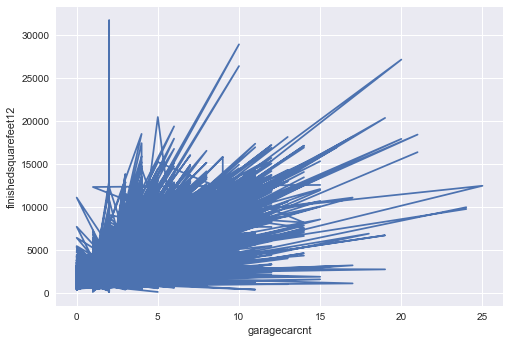

In [7]:
plt.plot(df['garagecarcnt'], df['finishedsquarefeet12'])
plt.xlabel('garagecarcnt')
plt.ylabel('finishedsquarefeet12')
#plt.plot(x=df['bathroomcnt'], y=df['bedroomcnt'])
plt.show()

The above line chart between garagecarcnt and finishedsquarefeet12 describes us the relation between the two properties. We can see that the garage cnt is mostly having same values for many of the finishedsqaurefeet12 values and it increases as finishedsquarefeet12 increases. This shows they are correlated.

# 2D Histogram

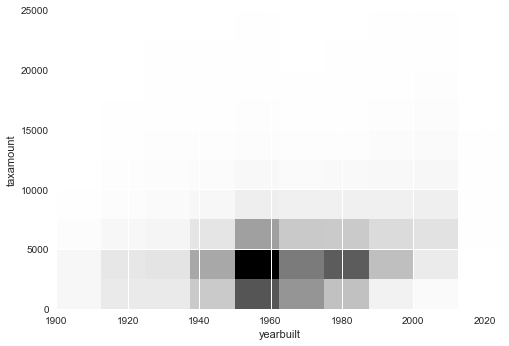

In [6]:
 
hist = {'yearbuilt':df['yearbuilt'], 'taxamount':df['taxamount']}
hist = pd.DataFrame(hist)
hist = hist.dropna()
plt.hist2d(hist['yearbuilt'],hist['taxamount'],range=[[1900,2025],[0,25000]])
plt.xlabel('yearbuilt')
plt.ylabel('taxamount')
plt.show()

Above histogram between taxamount and yearbuilt. This graph shows that tax amount has increased over the yearbuilt. In 1960, we have majority of taxes reporeted having values near 5000.

# Linear Regression, Ignored the absent values

In [8]:
fin_dat = df.merge(df_train,how="inner",on='parcelid')

#print df_train
d1 = {'logerror':fin_dat['logerror'],'yearbuilt':fin_dat['yearbuilt'],'numberofstories':fin_dat['numberofstories'],'structuretaxvaluedollarcnt':fin_dat['structuretaxvaluedollarcnt'],'finishedsquarefeet12':fin_dat['finishedsquarefeet12'], 'bedroomcnt':fin_dat['bedroomcnt'],'taxamount':fin_dat['taxamount'],'landtaxvaluedollarcnt':fin_dat['landtaxvaluedollarcnt']}
#print d1
d1=pd.DataFrame(d1).dropna()
r = d1.corr(method='pearson')
d1_temp = {'yearbuilt':d1['yearbuilt'],'finishedsquarefeet12':d1['finishedsquarefeet12'], 'bedroomcnt':d1['bedroomcnt'],'structuretaxvaluedollarcnt':d1['structuretaxvaluedollarcnt']}
d1_temp = pd.DataFrame(d1_temp)
#print d1_temp
x= d1_temp

y = pd.DataFrame({'logerror':d1['logerror']})


lm = linear_model.LinearRegression()

model = lm.fit(x,y)
prediction = lm.predict(x)

print "Prediction:"
print prediction[0:10]
print "Original:"
print y[0:10]

err = lm.score(x,y)
print "R^2 value:"+ str(err)


Prediction:
[[ 0.0078246 ]
 [ 0.00233428]
 [ 0.00965253]
 [ 0.01217143]
 [ 0.01566508]
 [ 0.02082788]
 [ 0.01148711]
 [ 0.01781757]
 [ 0.00654348]
 [ 0.01076019]]
Original:
   logerror
0    0.0953
1    0.0198
2    0.0060
3   -0.0566
4    0.0573
5    0.0564
6    0.0315
7    0.0257
8    0.0020
9   -0.0576
R^2 value:0.00136108897086


The linear regression model set up above is hving a score of 0.00136. 
The perfomrance of this model in predicting the logerror value is not up to the mark as we can see from above returned values.
The most important variable here is 'finishedsquarefeet12' as it is highly correlated among the other chosen variables.

# Removed Not a Number Value by mean for variables - 'finishedsquarefeet12', 'bedroomcnt','structuretaxvaluedollarcnt','taxamount','landtaxvaluedollarcnt' and by mode for variable - 'yearbuilt' and then applied linear regression to predict logerror:

In [9]:
#d1=pd.DataFrame(d1).dropna()
d1 = {'parcelid':fin_dat['parcelid'],'lotsizesquarefeet':fin_dat['lotsizesquarefeet'],'logerror':fin_dat['logerror'],'yearbuilt':fin_dat['yearbuilt'],'structuretaxvaluedollarcnt':fin_dat['structuretaxvaluedollarcnt'],'finishedsquarefeet12':fin_dat['finishedsquarefeet12'], 'bedroomcnt':fin_dat['bedroomcnt'],'taxamount':fin_dat['taxamount'],'landtaxvaluedollarcnt':fin_dat['landtaxvaluedollarcnt']}
d1 = pd.DataFrame(d1)
d1['yearbuilt'] = d1['yearbuilt'].fillna(d1['yearbuilt'].mode())
d1 = d1.fillna(d1.mean())

#print d1
r = d1.corr(method='pearson')
d1_temp = {'yearbuilt':d1['yearbuilt'],'finishedsquarefeet12':d1['finishedsquarefeet12'], 'bedroomcnt':d1['bedroomcnt'],'structuretaxvaluedollarcnt':d1['structuretaxvaluedollarcnt'],'taxamount':d1['taxamount'],'landtaxvaluedollarcnt':d1['landtaxvaluedollarcnt']}
d1_temp = pd.DataFrame(d1_temp)
x= d1_temp

y = pd.DataFrame({'logerror':d1['logerror']})


lm = linear_model.LinearRegression()

model = lm.fit(x,y)
prediction = lm.predict(x)

actual = y
print "Prediction:"
print prediction[0:10]
print "Original:"
print y[0:10]

err = lm.score(x,y)
print "R^2 value:"+ str(err)

print (((prediction - actual) ** 2).sum()) / len(prediction)

Prediction:
[[ 0.01225693]
 [ 0.00726722]
 [ 0.01000388]
 [ 0.01415272]
 [ 0.02240349]
 [ 0.02798618]
 [ 0.01474362]
 [ 0.0253031 ]
 [ 0.01137005]
 [ 0.01121191]]
Original:
   logerror
0    0.0953
1    0.0198
2    0.0060
3   -0.0566
4    0.0573
5    0.0564
6    0.0315
7    0.0257
8    0.0020
9   -0.0576
R^2 value:0.00395010313477
logerror    0.025844
dtype: float64


#K Nearest Neighbors for Prediction using aboved cleaned data:

In [10]:
random_indices = permutation(d1.index)


test_cutoff = int(math.floor(len(d1)/3))

test = d1.loc[random_indices[1:test_cutoff]]

train = d1.loc[random_indices[test_cutoff:]]
x_columns =['lotsizesquarefeet','yearbuilt','finishedsquarefeet12', 'bedroomcnt','structuretaxvaluedollarcnt','taxamount','landtaxvaluedollarcnt']

y_columns = ["logerror"]

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(train[x_columns],train[y_columns])

predictions = knn.predict(test[x_columns])

#print predictions

actual =  test[y_columns]
#print actual
print (((predictions - actual) ** 2).sum()) / len(predictions)


logerror    0.049808
dtype: float64


In [ ]:
orig = open('sample_submission.csv','rb')
res_file = open('out.csv','wb')

test = {'parcelid':df['parcelid'],'lotsizesquarefeet':df['lotsizesquarefeet'],'yearbuilt':df['yearbuilt'],'structuretaxvaluedollarcnt':df['structuretaxvaluedollarcnt'],'finishedsquarefeet12':df['finishedsquarefeet12'], 'bedroomcnt':df['bedroomcnt'],'taxamount':df['taxamount'],'landtaxvaluedollarcnt':df['landtaxvaluedollarcnt']}
test = pd.DataFrame(test)
test['yearbuilt'] = test['yearbuilt'].fillna(test['yearbuilt'].mode())
test = test.fillna(test.mean())
#print test
oct_train = df_train.loc[(df_train['transactiondate']>=datetime.date(2016,10,1)) & (df_train['transactiondate']<=datetime.date(2016,10,31))]

nov_train = df_train.loc[(df_train['transactiondate']>=datetime.date(2016,11,1)) & (df_train['transactiondate']<=datetime.date(2016,11,30))]

dec_train = df_train.loc[(df_train['transactiondate']>=datetime.date(2016,12,1)) & (df_train['transactiondate']<=datetime.date(2016,12,31))]

x_columns =['lotsizesquarefeet','yearbuilt','finishedsquarefeet12', 'bedroomcnt','structuretaxvaluedollarcnt','taxamount','landtaxvaluedollarcnt']

y_columns = ["logerror"]
#print oct_train[x_columns]
oct_dat = df.merge(oct_train,how="inner",on='parcelid')
oct_dat = {'parcelid':oct_dat['parcelid'],'lotsizesquarefeet':oct_dat['lotsizesquarefeet'],'logerror':oct_dat['logerror'],'yearbuilt':oct_dat['yearbuilt'],'structuretaxvaluedollarcnt':oct_dat['structuretaxvaluedollarcnt'],'finishedsquarefeet12':oct_dat['finishedsquarefeet12'], 'bedroomcnt':oct_dat['bedroomcnt'],'taxamount':oct_dat['taxamount'],'landtaxvaluedollarcnt':oct_dat['landtaxvaluedollarcnt']}
oct_dat = pd.DataFrame(oct_dat)
oct_dat['yearbuilt'] = oct_dat['yearbuilt'].fillna(oct_dat['yearbuilt'].mode())
oct_dat = oct_dat.fillna(oct_dat.mean())


nov_dat = df.merge(nov_train,how="inner",on='parcelid')
nov_dat = {'parcelid':nov_dat['parcelid'],'lotsizesquarefeet':nov_dat['lotsizesquarefeet'],'logerror':nov_dat['logerror'],'yearbuilt':nov_dat['yearbuilt'],'structuretaxvaluedollarcnt':nov_dat['structuretaxvaluedollarcnt'],'finishedsquarefeet12':nov_dat['finishedsquarefeet12'], 'bedroomcnt':nov_dat['bedroomcnt'],'taxamount':nov_dat['taxamount'],'landtaxvaluedollarcnt':nov_dat['landtaxvaluedollarcnt']}
nov_dat = pd.DataFrame(nov_dat)
nov_dat['yearbuilt'] = nov_dat['yearbuilt'].fillna(nov_dat['yearbuilt'].mode())
nov_dat = nov_dat.fillna(nov_dat.mean())

dec_dat = df.merge(dec_train,how="inner",on='parcelid')
dec_dat = {'parcelid':dec_dat['parcelid'],'lotsizesquarefeet':dec_dat['lotsizesquarefeet'],'logerror':dec_dat['logerror'],'yearbuilt':dec_dat['yearbuilt'],'structuretaxvaluedollarcnt':dec_dat['structuretaxvaluedollarcnt'],'finishedsquarefeet12':dec_dat['finishedsquarefeet12'], 'bedroomcnt':dec_dat['bedroomcnt'],'taxamount':dec_dat['taxamount'],'landtaxvaluedollarcnt':dec_dat['landtaxvaluedollarcnt']}
dec_dat = pd.DataFrame(dec_dat)
dec_dat['yearbuilt'] = dec_dat['yearbuilt'].fillna(dec_dat['yearbuilt'].mode())
dec_dat = dec_dat.fillna(dec_dat.mean())
#print dec_dat



knn1 = KNeighborsRegressor(n_neighbors=100)
knn1.fit(oct_dat[x_columns],oct_dat[y_columns])

prediction1 = knn1.predict(test[x_columns])

knn2 = KNeighborsRegressor(n_neighbors=100)
knn2.fit(nov_dat[x_columns],nov_dat[y_columns])

prediction2 = knn2.predict(test[x_columns])

knn3 = KNeighborsRegressor(n_neighbors=100)
knn3.fit(dec_dat[x_columns],dec_dat[y_columns])

prediction3 = knn3.predict(test[x_columns])

knn4 = KNeighborsRegressor(n_neighbors=100)
knn4.fit(train[x_columns],train[y_columns])

prediction4 = knn4.predict(test[x_columns])



print prediction4[1048540][0]
i=0
for line in orig:
    if 'ParcelId' in line:
        elem = line.split(',')
        res_file.write( ','.join(elem) )
        continue
    elem = line.split(',')
    #print elem
    elem[1] = str(prediction1[i][0])
    elem[2] = str(prediction2[i][0])
    elem[3] = str(prediction3[i][0])
    elem[4] = str(prediction4[i][0])
    elem[5] = str(prediction4[i][0])
    elem[6] = str(prediction4[i][0])+'\n'
    i=i+1
    res_file.write( ','.join(elem) )
    
res_file.close()
orig.close()

Above code is used to generate the sample_submission file.
On submission to zillow, the model got a score of 0.0781826.

# Report

I Started with the linear regression model on following properties:
'yearbuilt','finishedsquarefeet12', 'bedroomcnt'. 'structurevaluedollarcnt'
Initially, I ignored the Nan values and predicted the logerror by only considering the present values in dataset. This gave me the mean square error as 0.00136.

Then in the next step I cleaned the dataset by replacing the Nan values by mean values for 'finishedsquarefeet12', 'bedroomcn’,'structuretaxvaluedollarcnt','taxamount', ''landtaxvaluedollarcnt and mode value for 'yearbuilt'.
This linear regression model gave me mean square error of 0.025

To further improve my prediction, I changed my model from linear regression to K Nearest Neighbor model using the cleaned data.

K Nearest Neighbor Model:

The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values.
Let’s say that we have 3 different types of laptops. We know the name of the laptops, its ram capacity, & its processor speed, and whether or not it’s fast.:

Laptop,Processor Speed,Ram(in GB),is_fast
Apple Mac,2.67,6,True
Dell,2,4,False
Lenovo,3,8,True

Let’s say that we now have another laptop, but we don’t know how fast it is:

laptop,processor,ram,is_fast
Acer,3,6,Unknown

We want to figure out if the laptop is fast or not. In order to predict if it is with k nearest neighbors, we first find the most similar known laptop. In this case, we would compare the processor and ram values to find the most similar laptop, which is the apple. Since the apple is fast, we would predict that the Acer is also fast. This is an example of 1-nearest neighbors – we only looked at the most similar Laptop, giving us a k of 1.

If we performed a 2-nearest neighbors, we would end up with 2 True values (for the Apple and the Lenovo), which would average out to True.

If we did 3-nearest neighbors, we would end up with 2 True values and a False value, which would average out to True.
The number of neighbors we use for k-nearest neighbors (k) can be any value less than the number of rows in our dataset. In practice, looking at only a few neighbors makes the algorithm perform better, because the less similar the neighbors are to our data, the worse the prediction will be.

Before we can predict using KNN, we need to find some way to figure out which data rows are “closest” to the row we’re trying to predict on. A simple way to do this is to use Euclidean distance. 

To evaluate how KNN model works, we can calculate the mean square error.

For the train data set for this model, I used train_2016_v2.csv to split out data for months of oct, nov and dec. Merged this dataset with the properties_2016.csv on parcelid. Hence for predicting logerror for all the houses sold in month of oct 2016, I used the dataset of houses sold in oct as train set. Similarly repeated for nov and dec. 
For predicting logerror for houses in months of 2017, I used the complete train_2016_v2.csv to build the train data set.

In our case, the KNN did little well. It predicted the logerror for the parcelid at the instances given and accumulated a score of 0.0781826 on Zillow.

One interesting behaviour I had while implementing KNN in our experiment is that, instead of the general behaviour of KNN model that the prediction gets better by choosing less neighbors, in our case the prediction got better by increasing the number of neighbours used in the function to predict log error. 

References:
https://www.dataquest.io/blog/k-nearest-neighbors-in-python/